# Kernel SVM : 단순한 초평면이 아닌 non-seperable한 데이터셋을 공간을 확장시키덙

In [16]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [1]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
!pip install gensim
!pip install nltk
import nltk
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=3fd8efe74e628eabfd2387581852f6b822ecaee285468245dca5a806fdb166ea
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
nltk.download('stopwords')
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4, random_state=8)
y=y%2

print("X:{}\n".format(X.shape))
print(X)
print('y:{}\n'.format(y.shape))
print(y)

X:(100, 2)

[[ -1.72161036  -1.48033142]
 [ -3.6573384   -9.5482383 ]
 [  7.0778163    0.99508772]
 [ -1.36579859  -0.3148625 ]
 [ -2.66521206  -3.12591651]
 [  7.63027116   8.69797933]
 [ -5.27144331 -12.11880698]
 [  7.91767139   1.41547387]
 [ -1.41284184   0.11296348]
 [ -1.01519039  -1.03318203]
 [  8.2634157   10.34723435]
 [  6.96767867   8.9622523 ]
 [ -0.84779249  -2.12185612]
 [  7.48006237   2.49392925]
 [  7.71454967   1.8420701 ]
 [ -7.74064658  -8.61800744]
 [ -5.41087235  -8.7194128 ]
 [ -2.27579204  -2.89699926]
 [ -1.25668449  -2.33416219]
 [  7.61227907   9.4463627 ]
 [  8.81545663   8.76386046]
 [  7.1895354    0.43090048]
 [  7.40292703   9.16217702]
 [  5.17209648  11.78064756]
 [ -2.10476115  -1.57846672]
 [  6.5342397    9.45532341]
 [  7.59635095   8.0197955 ]
 [ -0.6560501    0.68997013]
 [ -4.86090778 -10.77386053]
 [  8.90864428   0.97764968]
 [  8.09770696  -0.58369965]
 [ -0.79757091  -2.88641638]
 [  9.92897802   1.76719511]
 [ -1.36106796  -2.02701586]
 [

Text(0, 0.5, 'Feat 1')

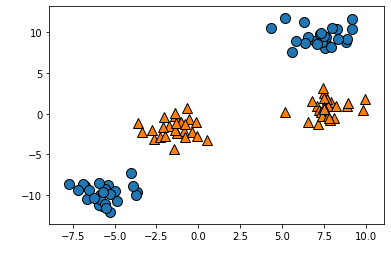

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feat 0',color='white')
plt.ylabel('Feat 1',color='white')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feat 1')

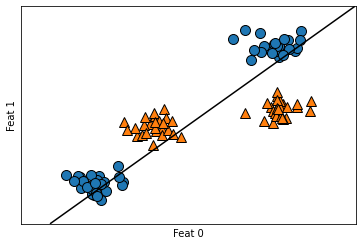

In [5]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feat 0')
plt.ylabel('Feat 1')

In [6]:
#Feat1을 제곱한 걸 추가해 보는거야 : w0x0 + w1x1 + w2(x1)^2

from mpl_toolkits.mplot3d import Axes3D, axes3d
X_new=np.hstack([X,X[:,1:]**2])



Text(0.5, 0, '(Feat1)^2')

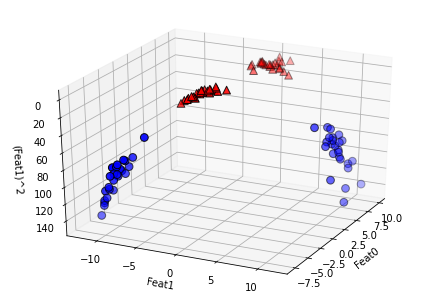

In [7]:

figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)

mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel('Feat0')
ax.set_ylabel('Feat1')
ax.set_zlabel('(Feat1)^2')

In [8]:
from sklearn.svm import SVC

X,y =mglearn.tools.make_handcrafted_dataset()

In [9]:
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)


Text(0, 0.5, 'Feat 1')

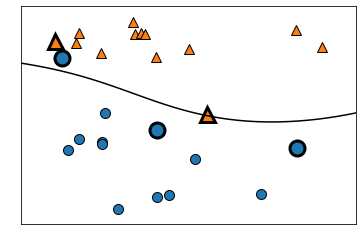

In [10]:
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv=svm.support_vectors_

sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feat 0", fontsize=10,color='white')
plt.ylabel("Feat 1", fontsize=10,color='white')

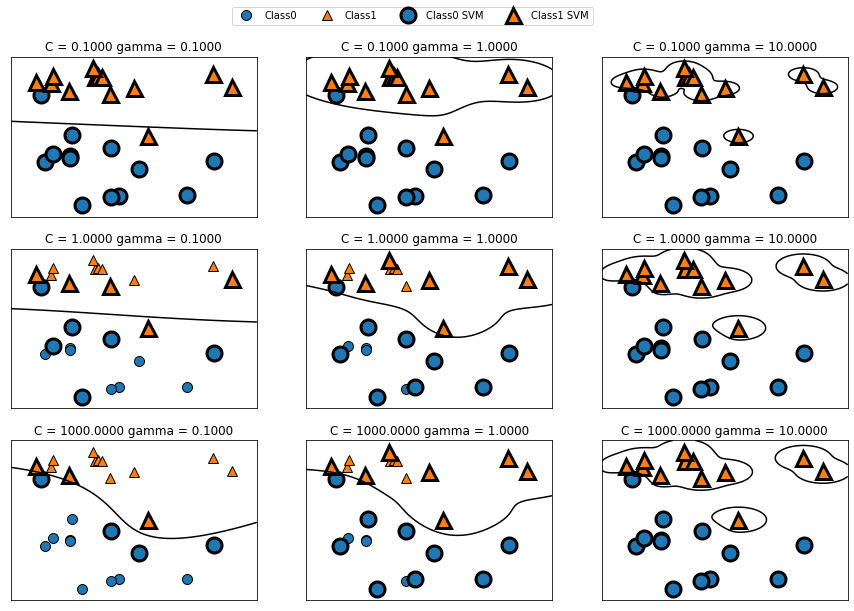

In [17]:
fig, axes=plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes,[-1,0,3]):
  for a, gamma in zip(ax,range(-1,2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["Class0", "Class1", "Class0 SVM", "Class1 SVM"],ncol=4, loc=(.9,1.2))

In [32]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,  random_state=0
)

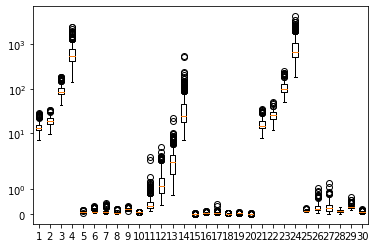

In [31]:
plt.boxplot(X_train)
plt.yscale("symlog")

In [33]:
svc=SVC()
svc.fit(X_train, y_train)

print("Training Accuracy:{:.3f}".format(svc.score(X_train,y_train)))
print("Test Accuracy:{:.3f}".format(svc.score(X_test,y_test)))

Training Accuracy:0.904
Test Accuracy:0.937


In [25]:
print(X_train.shape)
min_on_training=X_train.min(axis=0) #열 중 가장 작은 값
range_on_training=(X_train-min_on_training).max(axis=0)
print(min_on_training)
print(range_on_training)

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.11290e+01 2.41000e+01 1.44710e+02 2.35750e+03 9.20700e-02 2.92020e-01
 4.26800e-01 2.01200e-01 1.98000e-01 4.74800e-02 2.76150e+00 4.52220e+00
 2.12230e+01 5.34972e+02 2.16170e-02 1.04148e-01 3.96000e-01 5.27900e-02
 5.35780e-02 2.89452e-02 2.81100e+01 3.75200e+01 2.00790e+02 4.06880e+03
 1.51430e-01 1.03071e+00 1.25200e+00 2.90300e-01 5.07300e-01 1.52460e-01]


In [26]:
X_train_scaled=(X_train-min_on_training)/range_on_training
print(X_train_scaled)

[[0.23044157 0.32157676 0.21940433 ... 0.31484671 0.30277942 0.09858323]
 [0.20062473 0.42116183 0.19452699 ... 0.06965208 0.34042973 0.06677161]
 [0.62232003 0.76929461 0.60403566 ... 0.56079917 0.19850187 0.07431457]
 ...
 [0.11619102 0.35726141 0.11077327 ... 0.17402687 0.17524147 0.17263545]
 [0.12963226 0.35311203 0.11706171 ... 0.         0.06780997 0.06919848]
 [0.21434995 0.59004149 0.21235575 ... 0.33251808 0.10782574 0.21172767]]


In [27]:
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [28]:
X_test_scaled=(X_test-min_on_training)/range_on_training #왜 트레이닝으로 스케일링 하지

In [29]:
svc=SVC()
svc.fit(X_train_scaled, y_train) 

print("Training Accuracy:{:.3f}".format(svc.score(X_train,y_train)))
print("Test Accuracy:{:.3f}".format(svc.score(X_test,y_test)))

Training Accuracy:0.373
Test Accuracy:0.371
